# Comparing and Contrasting Different Compression Methods


## Library Imports


In [1]:
# Imports
from glob import glob
from scipy.io import wavfile
from signal_processing_utilities import process_signal
import time
import os
import numpy as np

import zlib
import gzip
import bz2
import lzma

from importlib.util import spec_from_loader, module_from_spec
from importlib.machinery import SourceFileLoader

import pandas as pd
import matplotlib.pyplot as plt

# Import encode
spec = spec_from_loader("encode", SourceFileLoader("encode", "../.././encode"))
encode = module_from_spec(spec)
spec.loader.exec_module(encode)

# Import decode
spec = spec_from_loader("decode", SourceFileLoader("decode", "../.././decode"))
decode = module_from_spec(spec)
spec.loader.exec_module(decode)

## Function Definitions


In [2]:
def compare_compression_ratio(file, compressed_file: str, method: str = None):
    """This function prints the compression ratio of two files.

    Args:
        file (numpy.ndarray): This is the array of amplitudes before
                              compression.
        compressed_file (str): This is the compressed representation of
                               the amplitudes after the method of
                               compression has been applied.
        method (str):  This is the string representing the method of
                       compression. Defaults to None.
    """
    percent_compression = (1 - (len(compressed_file) / len(file.tobytes()))) * 100
    if method != None:
        print(f"\nMethod of Compression: {method}")
    else:
        print("\n")
    print(f"Initial file size: {len(file.tobytes())} bytes.")
    print(f"Compressed File Size: {len(compressed_file)} bytes.")
    print(f"Percent of Compression: {percent_compression:.2f}%")
    print(f"\n")

In [3]:
def print_compression_efficiency_metrics_wrapper(
    file: str, compressed_file: str, start_time: int, stop_time: int, method: str
):
    """This is a wrapper function to print the start and stop times as
       well as the ratio of compression.

    Args:
        file (str): This is the array of amplitudes before compression
        compressed_file (str): This is the compressed representation of
                               the amplitudes after the method of
                               compression has been applied.
        start_time (int): This is the initial starting time in
                          nanoseconds.
        stop_time (int): This is the final time in nanoseconds of the
                         chosen method of compression.
        method (str): This is the string representing the
                                method of compression.
    """
    compare_compression_ratio(file=file, compressed_file=compressed_file, method=method)
    process_signal.print_time_each_function_takes_to_complete_processing(
        start_time=start_time, stop_time=stop_time, executed_line=method
    )

## Data Import & Formatting


In [26]:
data_dir = "../../data/"
data_file_list = glob(data_dir + "*.wav")
# current_file = data_file_list[0]

In [31]:
current_file = "../../data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav"
debug_file = "../../data/0052503c-2849-4f41-ab51-db382103690c.wav"

current_compressed_file = current_file + ".brainwire"
debug_compressed_file = debug_file + ".brainwire"

In [32]:
# Current file has less than 256 elements:
print(f"current_file: \n\t{current_file}\n")
sr, current_file_data = wavfile.read(current_file)
print(f"Number of unique elements: \n{len(np.unique(current_file_data))}\n")

# Debug file has more than 256 elements:
print(f"debug_file: \n\t{debug_file}\n")
sr, debug_file_data = wavfile.read(debug_file)
print(f"Number of unique elements: \n{len(np.unique(debug_file_data))}\n")

current_file: 
	../../data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav

Number of unique elements: 
158

debug_file: 
	../../data/0052503c-2849-4f41-ab51-db382103690c.wav

Number of unique elements: 
266



## Brainwire


In [ ]:
### Testing methods of compression where the unique amplitudes are > 256.

In [8]:
# Debug_data: The number of unique amplitudes are > 256.
# method_of_compression == 'w'
start_time = time.time_ns()
data_brainwire = encode.compress(debug_file, quick=True)
stop_time = time.time_ns()

process_signal.print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    original_data=current_file_data,
    compressed_data=data_brainwire,
    method="unique_amplitudes_l > 256; encode.compress(debug_file)",
)


Method of Compression: unique_amplitudes_l > 256; encode.compress(debug_file)
Initial File Size: 197398 bytes.
Compressed File Size: 114178 bytes.
Reduction in File Size: 83220 bytes.
Percent of Reduction: 42.16%
The file was reduced in size by 42.16% of the original size of the file. 
Percent of Compression: 57.84%
The compressed file size is 57.84% of the original file size.
Compression Ratio: 1.73



Executed Line: unique_amplitudes_l > 256; encode.compress(debug_file)...
Time Δ Nanoseconds: 631641000
Time Δ Microseconds: 631641.0
Time Δ Milliseconds: 631.641
Time Δ Seconds: 0.631641




In [9]:
# Debug_data: The number of unique amplitudes are > 256.
# method_of_compression == 'n'

start_time = time.time_ns()
parser = encode.initialize_argument_parser()
args = parser.parse_args([debug_file, debug_compressed_file, "-m=n"])
encode.main(args)
stop_time = time.time_ns()


with open(debug_compressed_file, "rb+") as fp:
    debug_compressed_file_data = fp.read()
    fp.close()


process_signal.print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    original_data=debug_file_data,
    compressed_data=debug_compressed_file_data,
    method="unique_amplitudes_l > 256; encode.compress(debug_file)",
)


Method of Compression: unique_amplitudes_l > 256; encode.compress(debug_file)
Initial File Size: 197378 bytes.
Compressed File Size: 88604 bytes.
Reduction in File Size: 108774 bytes.
Percent of Reduction: 55.11%
The file was reduced in size by 55.11% of the original size of the file. 
Percent of Compression: 44.89%
The compressed file size is 44.89% of the original file size.
Compression Ratio: 2.23



Executed Line: unique_amplitudes_l > 256; encode.compress(debug_file)...
Time Δ Nanoseconds: 3809468000
Time Δ Microseconds: 3809468.0
Time Δ Milliseconds: 3809.468
Time Δ Seconds: 3.809468




In [10]:
# Unique Amplitudes are < 256.
# Method of compression == 'u'

start_time = time.time_ns()
current_file_data_brainwire = encode.compress(current_file)
stop_time = time.time_ns()
process_signal.print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    original_data=current_file_data,
    compressed_data=current_file_data_brainwire,
    method="unique_amplitudes_l < 256; encode.compress(current_file_data)",
)


Method of Compression: unique_amplitudes_l < 256; encode.compress(current_file_data)
Initial File Size: 197398 bytes.
Compressed File Size: 80483 bytes.
Reduction in File Size: 116915 bytes.
Percent of Reduction: 59.23%
The file was reduced in size by 59.23% of the original size of the file. 
Percent of Compression: 40.77%
The compressed file size is 40.77% of the original file size.
Compression Ratio: 2.45



Executed Line: unique_amplitudes_l < 256; encode.compress(current_file_data)...
Time Δ Nanoseconds: 158361000
Time Δ Microseconds: 158361.0
Time Δ Milliseconds: 158.361
Time Δ Seconds: 0.158361




In [11]:
start_time = time.time_ns()
parser = encode.initialize_argument_parser()
compressed_file = current_file + ".brainwire"
args = parser.parse_args([current_file, compressed_file, "-m=n"])
encode.main(args)

with open(current_file + ".brainwire", "rb+") as fp:
    compressed_file_data = fp.read()
    fp.close()
stop_time = time.time_ns()
process_signal.print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    original_data=current_file_data,
    compressed_data=compressed_file_data,
    method="unique_amplitudes_l < 256; encode.main(); method of compression = 'n'",
)


Method of Compression: unique_amplitudes_l < 256; encode.main(); method of compression = 'n'
Initial File Size: 197398 bytes.
Compressed File Size: 88473 bytes.
Reduction in File Size: 108925 bytes.
Percent of Reduction: 55.18%
The file was reduced in size by 55.18% of the original size of the file. 
Percent of Compression: 44.82%
The compressed file size is 44.82% of the original file size.
Compression Ratio: 2.23



Executed Line: unique_amplitudes_l < 256; encode.main(); method of compression = 'n'...
Time Δ Nanoseconds: 3852025000
Time Δ Microseconds: 3852025.0
Time Δ Milliseconds: 3852.025
Time Δ Seconds: 3.852025




In [12]:
start_time = time.time_ns()
parser = encode.initialize_argument_parser()
compressed_file = current_file + ".brainwire"
args = parser.parse_args([current_file, compressed_file, "-m=h"])
encode.main(args)

with open(current_file + ".brainwire", "rb+") as fp:
    compressed_file_data = fp.read()
    fp.close()
stop_time = time.time_ns()
process_signal.print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    original_data=current_file_data,
    compressed_data=compressed_file_data,
    method="unique_amplitudes_l < 256; encode.compress(current_file_data)",
)


Method of Compression: unique_amplitudes_l < 256; encode.compress(current_file_data)
Initial File Size: 197398 bytes.
Compressed File Size: 130003 bytes.
Reduction in File Size: 67395 bytes.
Percent of Reduction: 34.14%
The file was reduced in size by 34.14% of the original size of the file. 
Percent of Compression: 65.86%
The compressed file size is 65.86% of the original file size.
Compression Ratio: 1.52



Executed Line: unique_amplitudes_l < 256; encode.compress(current_file_data)...
Time Δ Nanoseconds: 507702000
Time Δ Microseconds: 507702.0
Time Δ Milliseconds: 507.702
Time Δ Seconds: 0.507702




In [13]:
start_time = time.time_ns()
parser = encode.initialize_argument_parser()
compressed_file = current_file + ".brainwire"
args = parser.parse_args([current_file, compressed_file, "-m=u"])
encode.main(args)

with open(current_file + ".brainwire", "rb+") as fp:
    compressed_file_data = fp.read()
    fp.close()
stop_time = time.time_ns()
process_signal.print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    original_data=current_file_data,
    compressed_data=compressed_file_data,
    method="unique_amplitudes_l < 256; encode.compress(current_file_data)",
)


Method of Compression: unique_amplitudes_l < 256; encode.compress(current_file_data)
Initial File Size: 197398 bytes.
Compressed File Size: 80483 bytes.
Reduction in File Size: 116915 bytes.
Percent of Reduction: 59.23%
The file was reduced in size by 59.23% of the original size of the file. 
Percent of Compression: 40.77%
The compressed file size is 40.77% of the original file size.
Compression Ratio: 2.45



Executed Line: unique_amplitudes_l < 256; encode.compress(current_file_data)...
Time Δ Nanoseconds: 189542000
Time Δ Microseconds: 189542.0
Time Δ Milliseconds: 189.542
Time Δ Seconds: 0.189542




In [14]:
start_time = time.time_ns()
sample_rate, data_brainwire_amplitude_current_file = decode.decompress(
    current_file_data_brainwire
)
stop_time = time.time_ns()

In [15]:
not_equal = False
for index, value in enumerate(current_file_data):
    if data_brainwire_amplitude_current_file[index] != value:
        not_equal = True

print(not_equal)

False


In [16]:
data_brainwire_amplitude_pd = pd.DataFrame(
    data_brainwire_amplitude_current_file, columns=["Amplitude"]
)

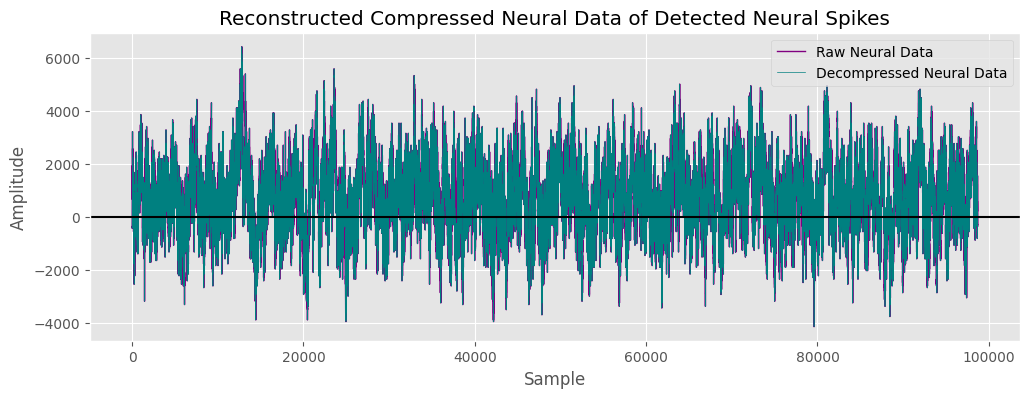

In [17]:
# Plotting the reconstructed neural current_file_data and the original raw neural current_file_data.

plt.figure(figsize=(12, 4))
plt.style.use("ggplot")

plt.title("Reconstructed Compressed Neural Data of Detected Neural Spikes")
plt.plot(current_file_data, color="purple", linewidth=1, label="Raw Neural Data")
plt.plot(
    data_brainwire_amplitude_pd,
    linewidth=0.5,
    color="teal",
    label="Decompressed Neural Data",
)
plt.grid(True)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.axhline(y=0, color="black")
plt.show()

In [18]:
file_path = os.getcwd() + "/data/test_compression.brainwire"

In [19]:
with open(file_path, "wb+") as fp:
    written_data = fp.write(data_brainwire)
    fp.close()

In [20]:
written_data

114178

## zlib


In [21]:
start_time = time.time_ns()
data_zlib = zlib.compress(current_file_data)
stop_time = time.time_ns()

print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    file=current_file_data,
    compressed_file=data_zlib,
    method="zlib.compress(current_file_data)",
)


Method of Compression: zlib.compress(current_file_data)
Initial file size: 197398 bytes.
Compressed File Size: 87243 bytes.
Percent of Compression: 55.80%



Executed Line: zlib.compress(current_file_data)...
Time Δ Nanoseconds: 30568000
Time Δ Microseconds: 30568.0
Time Δ Milliseconds: 30.568
Time Δ Seconds: 0.030568




## Gzip


In [22]:
start_time = time.time_ns()
data_gz = gzip.compress(current_file_data)
stop_time = time.time_ns()

print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    file=current_file_data,
    compressed_file=data_gz,
    method="gzip.compress(current_file_data)",
)


Method of Compression: gzip.compress(current_file_data)
Initial file size: 197398 bytes.
Compressed File Size: 86176 bytes.
Percent of Compression: 56.34%



Executed Line: gzip.compress(current_file_data)...
Time Δ Nanoseconds: 38800000
Time Δ Microseconds: 38800.0
Time Δ Milliseconds: 38.8
Time Δ Seconds: 0.0388




## bz2


In [23]:
start_time = time.time_ns()
data_bz2 = bz2.compress(current_file_data)
stop_time = time.time_ns()

print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    file=current_file_data,
    compressed_file=data_bz2,
    method="bz2.compress(current_file_data)",
)


Method of Compression: bz2.compress(current_file_data)
Initial file size: 197398 bytes.
Compressed File Size: 63435 bytes.
Percent of Compression: 67.86%



Executed Line: bz2.compress(current_file_data)...
Time Δ Nanoseconds: 13500000
Time Δ Microseconds: 13500.0
Time Δ Milliseconds: 13.5
Time Δ Seconds: 0.0135




## lzma


In [24]:
start_time = time.time_ns()
data_lzma = lzma.compress(current_file_data)
stop_time = time.time_ns()

print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    file=current_file_data,
    compressed_file=data_bz2,
    method="lzma.compress(current_file_data)",
)


Method of Compression: lzma.compress(current_file_data)
Initial file size: 197398 bytes.
Compressed File Size: 63435 bytes.
Percent of Compression: 67.86%



Executed Line: lzma.compress(current_file_data)...
Time Δ Nanoseconds: 44071000
Time Δ Microseconds: 44071.0
Time Δ Milliseconds: 44.071
Time Δ Seconds: 0.044071


